### Homework: Monte Carlo Integration

#### Consider the following integration problem:

\begin{aligned}
 I = \int_a^b g(x) dx,
\end{aligned}

where $\{ a,b \}$ = $\{1, 2.5\}$ and $g(x) = 1/(1+x^2)$.

- Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

- Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

 - Hint: The previous two questions force you to recognize that the integration problem of $I$ may not be stated as the expected value of $g(x)$.

- Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

In [5]:
using Plots, Distributions

In [28]:
g(x)= 1/(1+x^2)
function E(a, b, n=10_000)
    data = rand(Uniform(a, b), n)
    return mean(g.(data))
end

E (generic function with 2 methods)

In [44]:
#Expect_value
E(1,2.5)

0.26973748868213215

In [45]:
g(x)= 1/(1+x^2)
function integrate(a, b, n=10_000)
    f(x)= 1/(b-a)
    data = rand(Uniform(a, b), n)
    fnt(x) = g(x)/f(x)
    return mean(fnt.(data)), var(fnt.(data)) 
end

integrate (generic function with 2 methods)

In [47]:
#integration value
integrate(1, 2.5)[1]

0.4062671422037206

In [48]:
g(x)= 1/(1+x^2)
function change_variable(a, b, n=10_000)
    x(a, b, t) = a + (b - a) * t
    J(t) = (b-a)
    fnt(t) = g(x(a, b, t))*J(t)
    data = rand(Uniform(0, 1), n)
    return mean(fnt.(data)), var(fnt.(data)) 
end


change_variable (generic function with 2 methods)

In [51]:
change_variable(1, 2.5)[1]

0.40620087181374265

#### Consider the following integration problem: 
\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

In [11]:
g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
function integrate_p2(n=10_000)
    x(t) = (2*t-1) / (t-t^2)                         
    J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)       
    f(t) = g(x(t))*J(t)
    data = rand(Uniform(0, 1), n)
    return mean(f.(data))
end

integrate_p2 (generic function with 2 methods)

In [12]:
integrate_p2(1000)

4.444467265537943

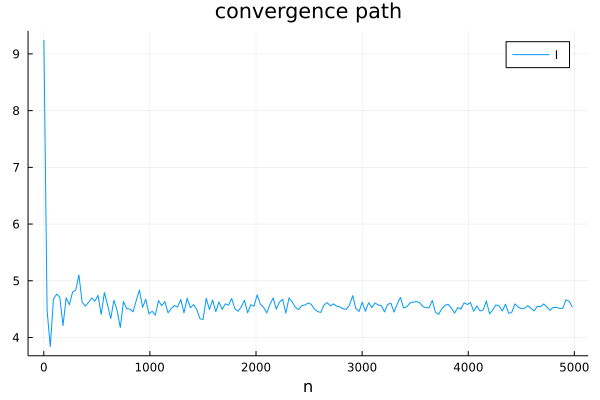

In [22]:
n=1:30:5000
i=integrate_p2.(n)
plot(n ,i,labels="I", title = "convergence path", xlabel="n")